In [2]:
import cv2
import glob
import matplotlib.pyplot as plt

In [5]:
images = glob.glob("Images/**")

In [8]:
images[14]

'Images\\fig12.jpg'

In [11]:
img = cv2.imread(images[14],0)

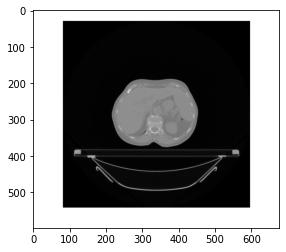

In [12]:
plt.imshow(img, 'gray')

In [13]:
r = (178, 174, 299, 206)

In [14]:
imCrop = img[int(r[1]):int(r[1]+r[3]), int(r[0]):int(r[0]+r[2])]

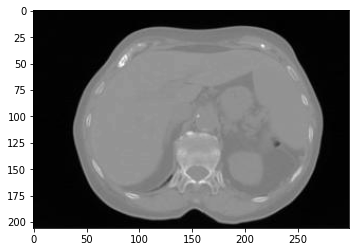

In [15]:
plt.imshow(imCrop, 'gray')

In [16]:
from skimage import filters, morphology

In [17]:
blur = filters.gaussian(imCrop)

In [18]:
th = filters.threshold_otsu(blur)

In [19]:
binary = blur > th

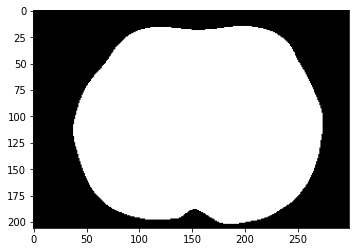

In [20]:
plt.imshow(binary, 'gray')


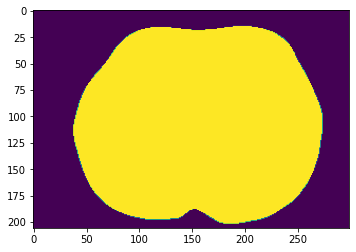

In [21]:
binary= filters.median(binary)
plt.imshow(binary)

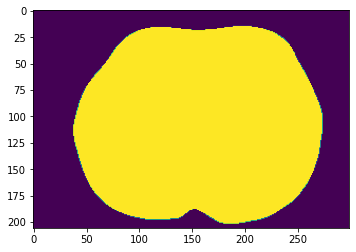

In [22]:
binary = morphology.binary_closing(binary, morphology.disk(1))
plt.imshow(binary)

In [23]:
# binary = morphology.binary_dilation(binary, morphology.disk(1))
# plt.imshow(binary)

In [24]:
from skimage import img_as_ubyte


In [25]:
opencv_image = img_as_ubyte(binary)

In [26]:
from skimage import measure

    
# Find contours at a constant value of 0.8
contours, _ = cv2.findContours(opencv_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)



In [27]:
import numpy as np

In [28]:
# sort the countours from biggest to lowest (in area)

In [29]:
contours = sorted(contours, key=cv2.contourArea, reverse=True)

In [30]:
# Discard the first one
# Second and third should be the lungs
lung_1 = contours[1]
lung_2 = contours[2]

IndexError: list index out of range

In [349]:
get_mask(lung_1)

<UMat 0000024470CFB6D0>

In [404]:
out_mask = np.zeros_like(imCrop)
cv2.drawContours(out_mask, [lung_1, lung_2], -1, 255, cv2.FILLED, 1)   

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

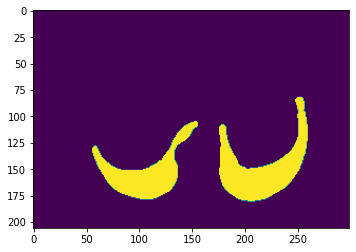

In [405]:
plt.imshow(out_mask)

In [ ]:
out=depth_array.copy()
out[out_mask == 0] = 0

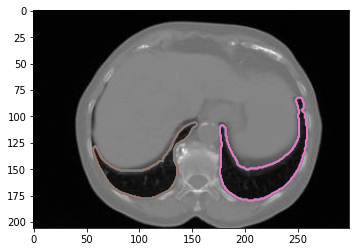

In [330]:
# Display the image and plot all contours found
fig, ax = plt.subplots()
ax.imshow(imCrop, cmap=plt.cm.gray)

for contour in contours:
    ax.plot(lung_1[:, 1], lung_1[:, 0], linewidth=2)
    ax.plot(lung_2[:, 1], lung_2[:, 0], linewidth=2)

In [244]:
get_contour_area(contours[0])

42290.58090221404

In [199]:
countour=contours[0]

In [142]:
# Expand numpy dimensions
c = np.expand_dims(countour.astype(np.float32), 1)
# Convert it to UMat object
c = cv2.UMat(c)
area = cv2.contourArea(c)

In [143]:
area

41314.28064262389

In [17]:
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(imCrop,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

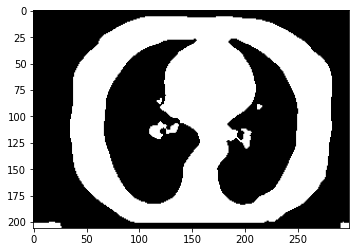

In [20]:
plt.imshow(th3, 'gray')